In [ ]:
'''
##Image recoginization use CNN (Convolutional neural network ):
#Pre-Requisites : 
#1. python 
#2. open cv
#tensorflow 

#dataset : inbuilt dataset : fashion_mnist
#framework :  tensorflow and keras 

#!pip install tensorflow
'''

'\n##Image recoginization use CNN (Convolutional neural network ):\n#Pre-Requisites : \n#1. python \n#2. open cv\n#tensorflow \n\n#dataset : inbuilt dataset : fashion_mnist\n#framework :  tensorflow and keras \n\n#!pip install tensorflow\n'

In [ ]:
# import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# split dataset
(X_train,Y_train),(X_test,Y_test)=tensorflow.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# check shape of training dataset
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape    #10000 records and each img have 28 x 28 pixcels

(10000, 28, 28)

In [ ]:
Y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

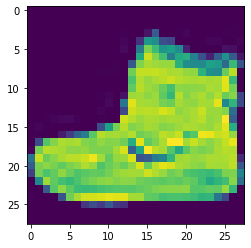

In [ ]:
plt.imshow(X_train[0])

In [ ]:
#show categ of 1st img
Y_train[0]

9

In [ ]:
#How many category in given dataset
#Loads the Fashion-MNIST dataset.
'''
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images. This dataset can be used as a
drop-in replacement for MNIST. The class labels are:

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot'''

'\nThis is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,\nalong with a test set of 10,000 images. This dataset can be used as a\ndrop-in replacement for MNIST. The class labels are:\n\nLabel\tDescription\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot'

In [ ]:
#category user defined list object
category=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
'Shirt','Sneaker','Bag','Ankle boot']
print(category)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
for i,v in enumerate(category):
  print(i,v)

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


In [ ]:
#to show 25 

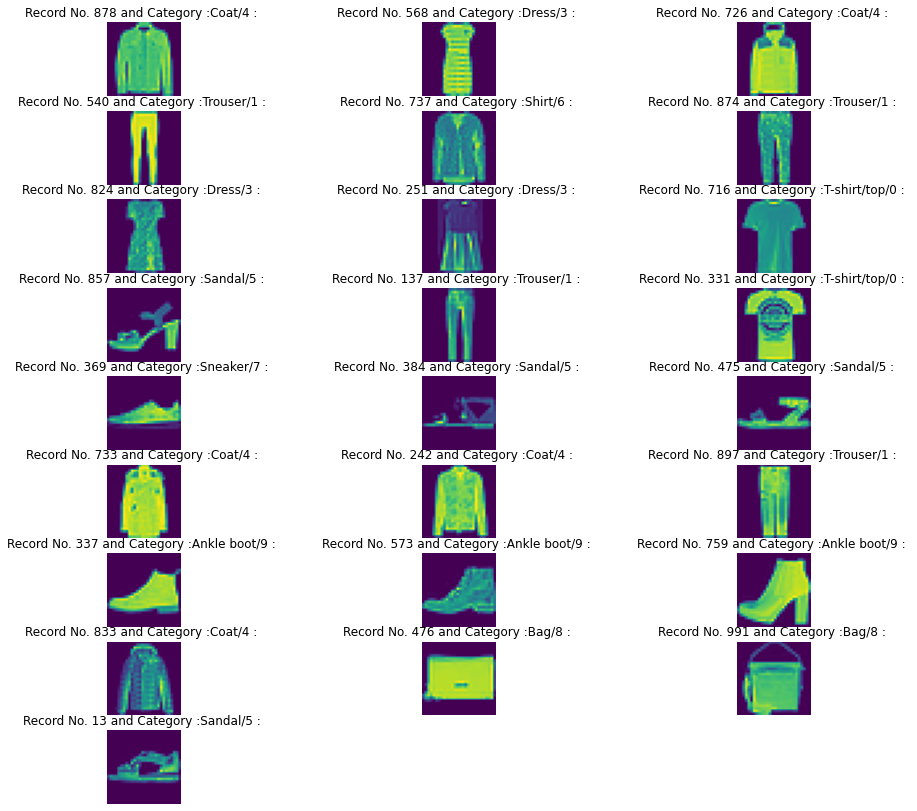

In [ ]:
#To show 25 images randomly 
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(10,3,j);j=j+1
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title("Record No. {} and Category :{}/{} : ".
              format(i,category[Y_train[i]],Y_train[i]))

In [ ]:
# 2nd lecture

In [ ]:
#compulsory : 4 dimension images required for training 

#CNN means Convolutional neural network CNN : 
#Note : In CNN , we have to give 4 dimension input data(images) compulsory

#but we have 3 dimension  input images
#check dimension of dataset 
print("Dimension of Training data : ",X_train.ndim)

#We have 3 dimensional dataset
print("Shape of Training Data : ",X_train.shape)

Dimension of Training data :  3
Shape of Training Data :  (60000, 28, 28)


In [ ]:
# converts 3 dimension images into 4 dimensions,use inbuilt function 
# expand_dims() which define in numpy library
# we converts 3d images input which hold in X_train intto 4d
X_train=np.expand_dims(X_train,-1)
# check dimension of x_train after converts
print(X_train.ndim)
# check shape of  x_train
print(X_train.shape)

4
(60000, 28, 28, 1)


In [ ]:
# similar converts x_test from 3d to 4d
X_test=np.expand_dims(X_test,-1)
print(X_test.ndim)
print(X_test.shape)

4
(10000, 28, 28, 1)


In [ ]:
# minmax scaler means normalization
# feature scaling (0-255) : apply minmaxscaler means normalised scaling
#Feature Scaling (0-255): Apply MinMaxScaler  means Normalised scaling
#scaling apply on X_train and X_test input  
# scaling apply on x_train and x_test input
X_train=X_train/255
X_test=X_test/255
'''
or
from sklearn.preprocessing import MinMaxScaler
#create object of MinMaxScaler class
mms=MinMaxScaler()
X_train.mms.fit_transform(X_train)
X_test=mms.transform(X_test)
'''

'\nor\nfrom sklearn.preprocessing import MinMaxScaler\n#create object of MinMaxScaler class\nmms=MinMaxScaler()\nX_train.mms.fit_transform(X_train)\nX_test=mms.transform(X_test)\n'

In [ ]:
X_train[0] #extract first image

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
#training error>=testing error :  model is perfect means model is not 
#overfit
#Split Dataset (To split training dataset into (80%  train data and 
#20% :- validation data for check overfitting model)
#means take 80% data for training and 20% for validation from X_train and 
#Y_train 
#call train_test_split
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=1)

In [ ]:
# X_train.shape
# X_val.shape

In [ ]:
#Model Building : CNN (Convolutional Neural Network)
#create object of Sequential class
model=tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),
    padding='valid',activation='relu',input_shape=[28,28,1]),
        tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tensorflow.keras.layers.Flatten(),
tensorflow.keras.layers.Dense(units=128,activation='relu'),#hidden layer
tensorflow.keras.layers.Dense(units=10,activation='softmax') #output layer
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
# compile the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
# create a procedure for callback(earlystoping)
#Early Stopping : 
#EarlyStopping : for decide epoch
#create a procedure for callback 
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
#EarlyStopping() inbuilt function
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.0001, #value of lambda 
    patience=12,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)

In [ ]:
# train the model
model.fit(X_train,Y_train,batch_size=512,epochs=2000,callbacks=cb,
          validation_data=(X_val,Y_val))

Epoch 1/2000
94/94 [==============================] - 24s 246ms/step - loss: 0.6231 - accuracy: 0.7901 - val_loss: 0.4239 - val_accuracy: 0.8479
Epoch 2/2000
94/94 [==============================] - 26s 269ms/step - loss: 0.3728 - accuracy: 0.8702 - val_loss: 0.3624 - val_accuracy: 0.8671
Epoch 3/2000
94/94 [==============================] - 25s 268ms/step - loss: 0.3249 - accuracy: 0.8862 - val_loss: 0.3184 - val_accuracy: 0.8856
Epoch 4/2000
94/94 [==============================] - 23s 241ms/step - loss: 0.2939 - accuracy: 0.8963 - val_loss: 0.2952 - val_accuracy: 0.8930
Epoch 5/2000
94/94 [==============================] - 22s 238ms/step - loss: 0.2685 - accuracy: 0.9057 - val_loss: 0.2882 - val_accuracy: 0.8952
Epoch 6/2000
94/94 [==============================] - 22s 238ms/step - loss: 0.2529 - accuracy: 0.9109 - val_loss: 0.2887 - val_accuracy: 0.8953
Epoch 7/2000
94/94 [==============================] - 22s 239ms/step - loss: 0.2377 - accuracy: 0.9155 - val_loss: 0.2627 - val_ac

In [ ]:
# check training score
model.evaluate(X_train,Y_train)

1500/1500 [==============================] - 14s 9ms/step - loss: 0.0856 - accuracy: 0.9719


[0.08560958504676819, 0.9719374775886536]

In [ ]:
# check testing score
model.evaluate(X_val,Y_val)

375/375 [==============================] - 4s 10ms/step - loss: 0.2574 - accuracy: 0.9183


[0.25741440057754517, 0.9183333516120911]

In [ ]:
# predict the model with 30% data in testing (x_test,y_test)
y_pred=model.predict(X_test).round(4)

313/313 [==============================] - 3s 8ms/step


In [ ]:
[np.argmax(i) for i in y_pred]

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 8,
 3,
 4,
 1,
 2,
 4,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 6,
 6,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 4,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 3,
 5,
 2,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 3,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 6,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 2,
 2,
 2,


In [ ]:
# actual and predicted
category[Y_test[6]],category[np.argmax(y_pred[6])]

('Coat', 'Coat')

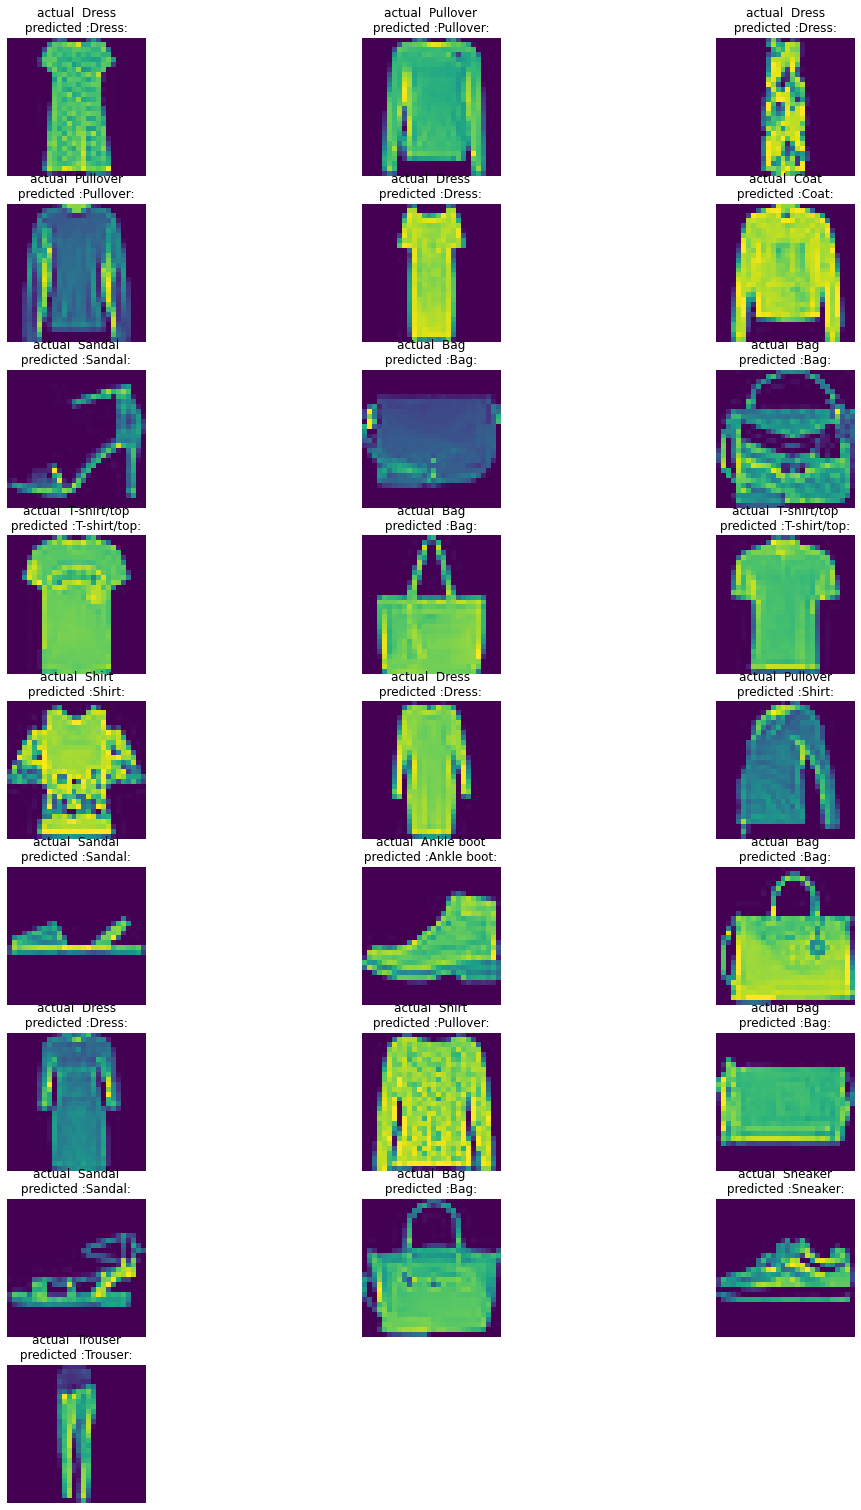

In [ ]:
#To show 25 images randomly 
plt.figure(figsize=(18,30))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(10,3,j);j=j+1
    plt.imshow(X_test[i].reshape(28,28))
    plt.axis('off')
    plt.title("actual  {}\n predicted :{}: ".
              format(category[Y_test[i]],category[np.argmax(y_pred[i])]))

In [ ]:
# report  generate
# print confusion matrix
y_pred=[np.argmax(i) for i in y_pred]
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_pred))

[[906   0  15  18   3   1  52   0   5   0]
 [  2 983   0  10   2   0   2   0   1   0]
 [ 20   0 876   7  51   1  45   0   0   0]
 [ 25   4  10 926  19   0  13   0   3   0]
 [  2   1  48  34 872   1  42   0   0   0]
 [  1   0   0   0   0 980   0  13   1   5]
 [141   1  59  34  57   0 701   0   7   0]
 [  0   0   0   0   0  13   0 971   1  15]
 [  5   1   2   4   2   3   2   2 979   0]
 [  1   0   0   0   0   6   0  25   0 968]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.88      0.87      1000
           3       0.90      0.93      0.91      1000
           4       0.87      0.87      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.82      0.70      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



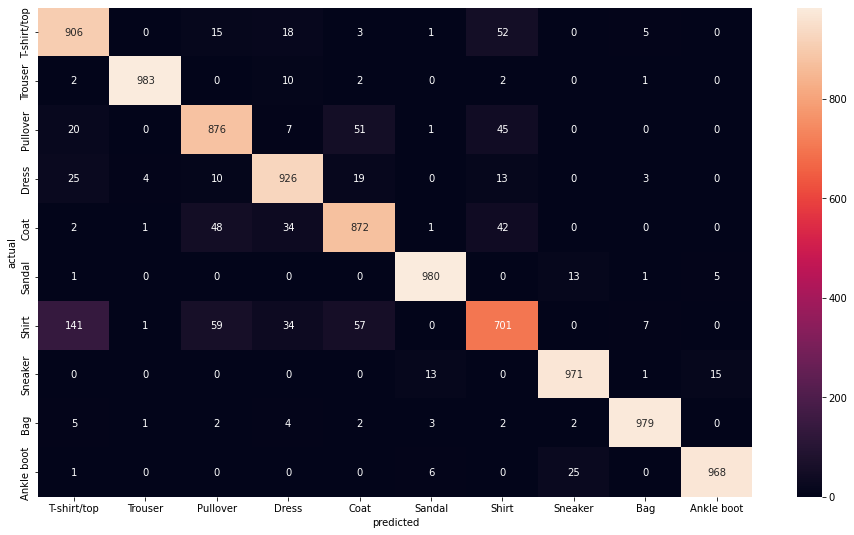

In [ ]:
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True,fmt="d",xticklabels=category,
            yticklabels=category)
# fmt means format and d means int type
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()